In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import TfidfVectorizer

sns.set(style="whitegrid")

In [7]:
df = pd.read_csv("../data/raw/dataset.csv")
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [8]:
df.info()
df["sentiment"].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


sentiment
positive    25000
negative    25000
Name: count, dtype: int64

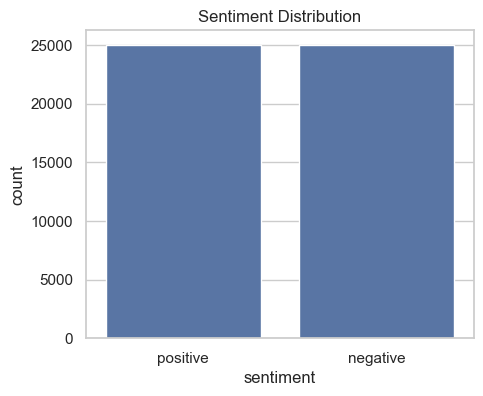

In [9]:
plt.figure(figsize=(5,4))
sns.countplot(x="sentiment", data=df)
plt.title("Sentiment Distribution")
plt.show()


In [10]:
tfidf = TfidfVectorizer(
    stop_words="english",
    max_features=20
)

X = tfidf.fit_transform(df["review"])
feature_names = tfidf.get_feature_names_out()

mean_tfidf = X.mean(axis=0).A1

tfidf_df = pd.DataFrame({
    "word": feature_names,
    "tfidf_score": mean_tfidf
}).sort_values(by="tfidf_score", ascending=False)

tfidf_df


,word,tfidf_score
1,br,0.388928
11,movie,0.229480
5,film,0.212423
9,like,0.117194
8,just,0.107690
6,good,0.100682
17,time,0.088710
15,story,0.086713
14,really,0.081934
7,great,0.076753


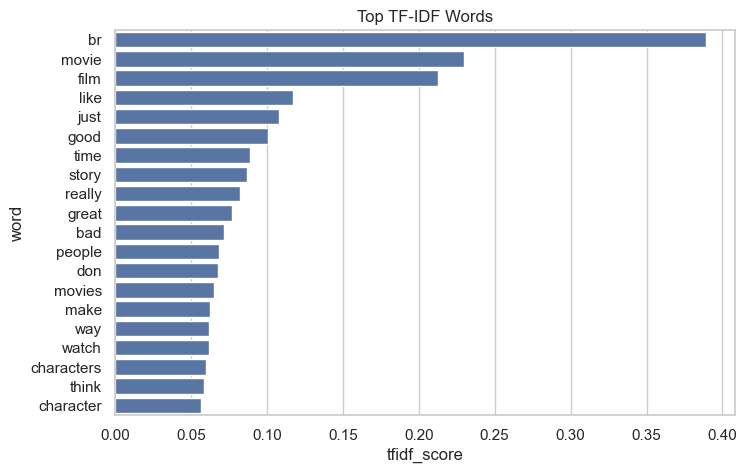

In [11]:
plt.figure(figsize=(8,5))
sns.barplot(x="tfidf_score", y="word", data=tfidf_df)
plt.title("Top TF-IDF Words")
plt.show()
